<link rel="stylesheet" type="text/css" href="custom.css">

## Lab 07: Autoregressive models

## Preliminaries: imports and load data

### Imports

In [1]:
import scipy
from matplotlib import pyplot as plt
import numpy as np
import panel as pn
import holoviews as hv
import statsmodels.api as sm
import xarray as xr

### Initialize panel and holoviews for interactive plots

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
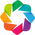

In [2]:
hv.extension("bokeh")
pn.extension()

### Load the Central Park data into this python session

:::{admonition} Explanation of data downloading logic (if you're interested)
:class: dropdown
To make these Jupyter notebooks work when launched to Google Colab---which you can do by clicking the "rocket" icon in the top right from the rendered version of this page on the web---we need some logic that downloads the data.

While we're at it, we use the file's "hash" to check that it has not been altered or corrupted from its original version.  We do this whether or not you've downloaded the file, since it's possible to (accidentally) modify the netCDF file on disk after you downloaded it.

In the rendered HTML version of the site, this cell is hidden, since otherwise it's a bit distracting.  But you can click on it to reveal its content.

If you're in a Google Colab session, you don't need to modify anything in that cell; just run it.  Otherwise, modify the `LOCAL_DATA_DIR` variable defined in the next python cell to point to where the dataset lives on your machine---or where you want it to be downloaded to if you don't have it already.
:::

In [3]:
!pip install pooch

# The above command installs the needed `pooch` 3rd-party package if it's not already installed.


import hashlib  # for verifying that the Central Park file is not corrupted
import pathlib  # for constructing paths to the dataset's location on disk
import sys  # for checking if this is a Google Colab session or not
import pooch  # for downloading the dataset from the web, if needed


# Replace "../data" as needed to point to the correct directory for you.
# This can be an *absolute path* or a *relative path*.  One dot, `.`, means
# "this directory", while two dots, `..`, means "go up one directory."
LOCAL_DATA_DIR = "../data"  # If you're in Colab: just ignore this.

# The URL where the dataset can be downloaded from.
DATA_URL = (
    "https://spencerahill.github.io/25f-stat-methods-course/_downloads/"
    "91803b82950d49961a65355c075439b3/central-park-station-data_1869-01-01_2023-09-30.nc"
)

# This HASH_HEX stores a "hash" which we use to verify that the data you end up
# with has not been altered or corrupted compared to the one at the above URL.
HASH_HEX = "85237a4bae1202030a36f330764fd5bd0c2c4fa484b3ae34a05db49fe7721eee"


def create_data_path(
    colab_dir="/content/data", 
    local_dir=LOCAL_DATA_DIR,
    filename="central-park-station-data_1869-01-01_2023-09-30.nc",
):
    """Set the path for the data, whether on colab or a local Jupyter session."""
    is_this_a_colab = "google.colab" in sys.modules
    if is_this_a_colab:
        data_dir = colab_dir 
    else: 
        data_dir = local_dir

    DATA_DIR = pathlib.Path(data_dir)
    DATA_DIR.mkdir(parents=True, exist_ok=True)
    return DATA_DIR / filename


def sha256sum(path: pathlib.Path) -> str:
    """Get the hash of the file at the specified path."""
    return hashlib.sha256(path.read_bytes()).hexdigest()


DATA_PATH = create_data_path()
# Determine if we'll need to download the data, which we'll do if either (a) 
# the data can't be found, or (b) it appears corrupted/modified from the
# "master" file at the above URL.
need_fetch = (not DATA_PATH.exists()) or (sha256sum(DATA_PATH) != HASH_HEX)

# Download the data if needed.
if need_fetch:
    fetched_data = pooch.retrieve(
        url=DATA_URL, 
        known_hash=f"sha256:{HASH_HEX}",
        path=DATA_PATH.parents[0], 
        fname=DATA_PATH.name,
    )
    print(f"\nDownloaded and verified: {fetched_data}")
else:
    print(f"\nVerified existing file at {DATA_PATH}")

Looking in links: https://pypi.python.org/pypi, https://testpypi.python.org/pypi

Verified existing file at ../data/central-park-station-data_1869-01-01_2023-09-30.nc


In [4]:
import xarray as xr

# `DATA_PATH` variable was created by the hidden cell just above. 
# Un-hide that cell if you want to see the details.
ds_cp = xr.open_dataset(DATA_PATH)
ds_cp

<xarray.Dataset> Size: 5MB
Dimensions:        (time: 56520)
Coordinates:
  * time           (time) datetime64[ns] 452kB 1869-01-01 ... 2023-09-30
Data variables:
    temp_max       (time) int64 452kB ...
    temp_min       (time) int64 452kB ...
    temp_avg       (time) float64 452kB ...
    temp_anom      (time) float64 452kB ...
    heat_deg_days  (time) int64 452kB ...
    cool_deg_days  (time) int64 452kB ...
    precip         (time) float64 452kB ...
    snow_fall      (time) float64 452kB ...
    snow_depth     (time) int64 452kB ...

### Clean the data

In [5]:
# Clean: drop all 0 values of the temperature fields which are (mostly) spurious
for varname in ["temp_avg", "temp_min", "temp_max"]:
    ds_cp[varname] = ds_cp[varname].where(ds_cp[varname] != 0.0)

## Autoregressive models

In **autoregressive models** (often referred to as AR models), the value at each timestep is set by those before, plus noise.  Specifically, the value at a given timestep is determined by some linear combination of one or more previous timesteps, plus white noise.

The simplest autoregressive model is the **1st order autoregressive model**, or **AR(1)** for short.


### AR(1): 1st order autoregressive

#### The model
An AR(1) process, denoted here as $X$, is given by

$$X_t=\phi X_{t-1}+W_t+k,$$

where $X_t$ is the value at time $t$, $\phi$ is a constant, $X_{t-1}$ is the value at the preceding time, $W_t$ is a white noise process, and $k$ is a constant.

#### White noise processes

In a **white noise** process, the distribution at each timestep is independent of the distributions at all other timesteps.  

In other words, every time step is randomly drawn without any influence from the values of any preceding timesteps.



In turn, the value drawn at a given timestep has no influence on that of any subsequent timesteps.

This contrasts with many physical processes, where through e.g. a conservation law the value now depends very much on the value immediately before.

In **stationary white noise**, not only is each timestep independent, but the distribution being drawn from at each timestep is identical across timesteps.  

Whereas if the distribution varies across timesteps in any way---but the draw at each timestep remains independent from those of any others---the process is *nonstationary white noise*.

Arguably the most important white noise process is one that draws from the normal distribution: **Gaussian white noise** (GWN).

Next: timeseries generated from one stationary and two non-stationary GWN processes.

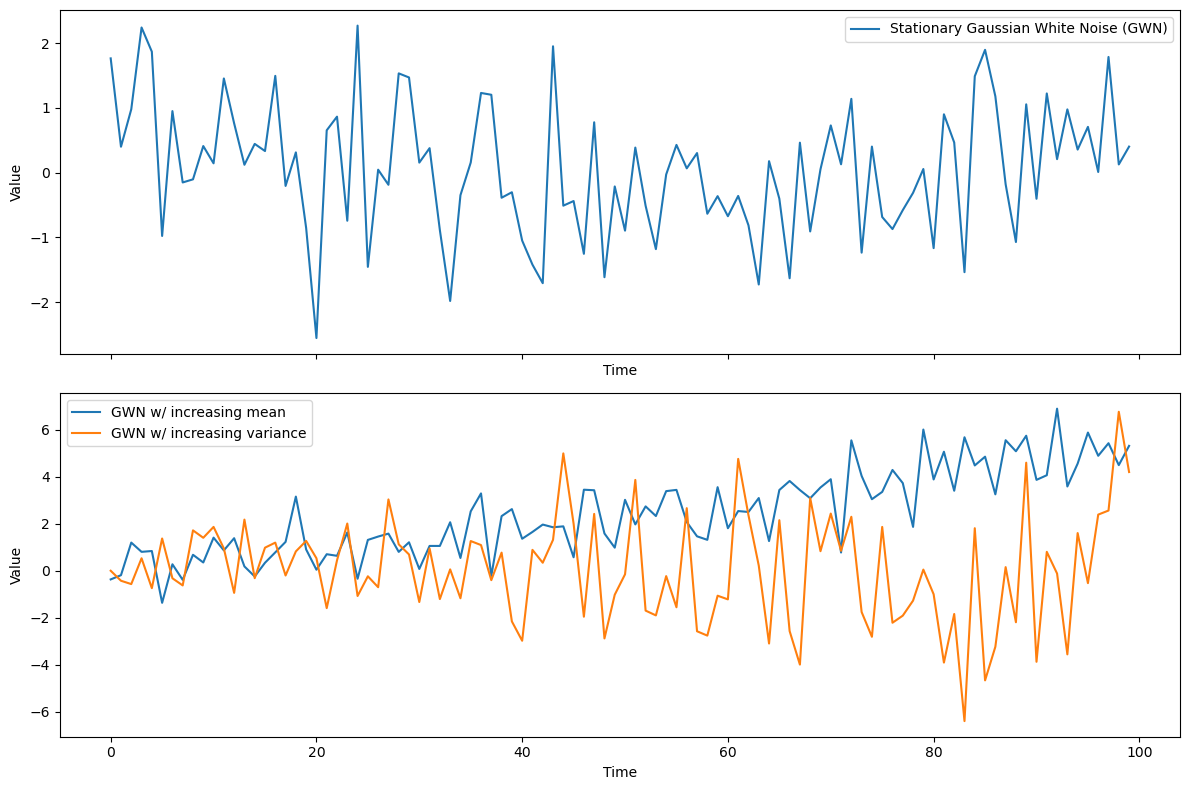

In [6]:
# Generate stationary Gaussian white noise
np.random.seed(0)
stationary_time_series = np.random.normal(loc=0.0, scale=1.0, size=100)

# Generate non-stationary Gaussian white noise with growing variance
time = np.arange(100)
growing_variance = 0.1 * time  # Variance grows over time
ts_inc_var = np.random.normal(loc=0.0, scale=np.sqrt(growing_variance))

# Generate non-stationary Gaussian white noise with growing variance
time = np.arange(100)
growing_mean = 0.05 * time  # Variance grows over time
ts_inc_mean = np.random.normal(loc=growing_mean, scale=1)

# Create the plot
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot the stationary time series
axs[0].plot(stationary_time_series, label="Stationary Gaussian White Noise (GWN)")
axs[0].legend()

# Plot the non-stationary time series
axs[1].plot(ts_inc_mean, label="GWN w/ increasing mean")
axs[1].legend()

axs[1].plot(ts_inc_var, label="GWN w/ increasing variance")
axs[1].legend()

# Set common labels
for ax in axs:
    ax.set_xlabel("Time")
    ax.set_ylabel("Value")

plt.tight_layout()
plt.show()

#### Connection to dynamical systems
The laws of physics and thermodynamics usually take the following form:

$$\frac{\mathrm{d}X}{\mathrm{d}t}=aX+\text{forcing}+\text{noise},$$

where $a$ is some constant (usually negative, indicating a damping).

We can rearrange the AR(1) equation above to resemble a discretized verison of this general form.  Subtract $X_{t-1}$ from both sides and divide by the time spacing between consecutive points, which we'll denote $\delta t$.  Then we have

$$\frac{X_t-X_{t-1}}{\delta t}=aX_{t-1}+\tilde{k}+\tilde{W}_t,$$

having defined $a\equiv(\phi - 1)/\delta t$, $\tilde{W}_t\equiv W_t/\delta t$, and $\tilde{k}\equiv k/\delta t$.  

The $\tilde{k}$ term is analogous to the forcing, and the $\tilde{W}_t$ term is the noise.  

Finally, recall from calculus that the left-hand side is the discrete approximation to a derivative, which becomes increasingly accurate as the timestep becomes smaller:

$$\lim_{\delta t\rightarrow0}\frac{X_t-X_{t-1}}{\delta t}=\frac{\mathrm{d}X}{\mathrm{d}t}.$$

#### The first timestep
If at the initial time $t=0$ this process has the value $x_0$, then the value after one *timestep*, at $t=1$, is

$$X_1=\phi x_0+W_1+k.$$

This is the sum of a constant ($\phi x_0+k$) and a random draw from a Gaussian, $W_1$.  That means we can't know the value $X_1$ exactly.  But we can determine its probability distribution.  

The Gaussian has zero mean and variance $\sigma^2_W$, and so the resulting *conditional* distribution is:

$$p(x_1|x_0)\sim\mathcal{N}(\phi x_0+k, \sigma^2_W).$$

In other words, *given that the value at $t=0$ is $x_0$*, the distribution of $x_1$ is normally distributed with mean $\phi x_0+k$ and variance $\sigma^2_W$.

To illustrate this, the figure below shows many independent realizations of an AR(1) process.  Across all cases, the constants $\phi$, $k$, and $\sigma^2_W$ do not differ, and they also all start from the same initial condition $x_0$.  

But the random draw $W_1$ *is* different across the cases, leading to different values at $t_1$ across them.

The panel on the right shows the corresponding histogram in the bars, along with the actual PDF, $\mathcal{N}(\phi x_0+k, \sigma^2_W)$, in red.

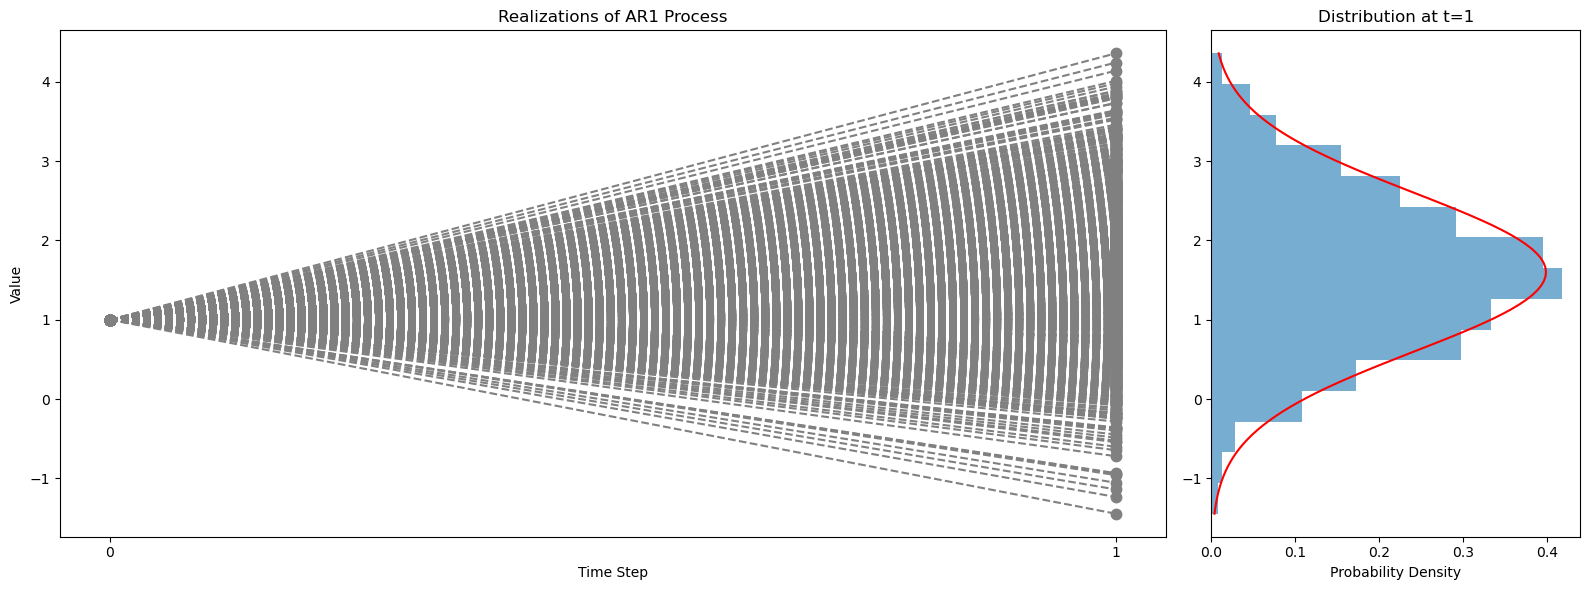

In [7]:
# Parameters
mu = 1  # Constant term
alpha = 0.6  # Autoregressive coefficient
sigma = 1  # Standard deviation of the white noise
num_realizations = 1000  # Number of realizations
num_timesteps = 2  # Only two timesteps
init_val = 1
# Generating realizations for two timesteps
realizations = np.zeros((num_realizations, num_timesteps))
for i in range(num_realizations):
    epsilon = np.random.normal(0, sigma, num_timesteps)  # White noise
    realizations[i, 0] = init_val  # Initial value at t=0
    realizations[i, 1] = mu + alpha * realizations[i, 0] + epsilon[1]

# Extracting values at t=1 for histogram and PDF
X_t = realizations[:, 1]

# Analytical PDF for X_t
pdf_x = np.linspace(min(X_t), max(X_t), 100)
pdf_y = scipy.stats.norm.pdf(pdf_x, mu + alpha * realizations[i, 0], sigma)

# Plotting
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(16, 6), gridspec_kw={"width_ratios": [3, 1]}
)

# Time series plot
for i in range(num_realizations):
    ax1.plot(
        range(num_timesteps),
        realizations[i],
        color="grey",
        linestyle="--",
        marker=".",
        markersize=15,
    )
ax1.set_xlabel("Time Step")
ax1.set_ylabel("Value")
ax1.set_title("Realizations of AR1 Process")
ax1.set_xticks(range(num_timesteps))
# ax1.grid(True)

# Rotated histogram and PDF
ax2.hist(X_t, bins=15, orientation="horizontal", density=True, alpha=0.6)
ax2.plot(pdf_y, pdf_x, "r-")
ax2.set_xlabel("Probability Density")
ax2.set_title("Distribution at t=1")
# ax2.grid(True)

plt.tight_layout()
plt.show()

#### The second timestep

Now let's advance another timestep to $t=2$.  Plugging everything in gives:

\begin{align}
X_2&=\phi X_1\qquad\qquad\quad+W_2+k\\
&=\phi(x_0+W_1+k)+W_2+k\\
&=\phi^2x_0+(1+\phi)k+(W_2+\phi W_1)
\end{align}

The first equality is by definition, the second equality comes from plugging in the value we derived above of $x_1$, and the last is just rearranging term.  

Similar to the value at the first timestep, this is the sum of a constant, $\phi^2x_0+(1+\phi)k$, and Gaussian noise, $W_2+\phi W_1$.  

(This is true because, in general, the sum of independent draws from two Gaussians is itself Gaussian with variance equal to the sum of the variances of the two Guassians.)  

As such, the conditional distribution is:

$$p(x_2|x_0)\sim\mathcal{N}(\phi^2x_0+(1+\phi)k,(1+\phi^2)\sigma^2_W)$$

Here's the corresponding illustration:

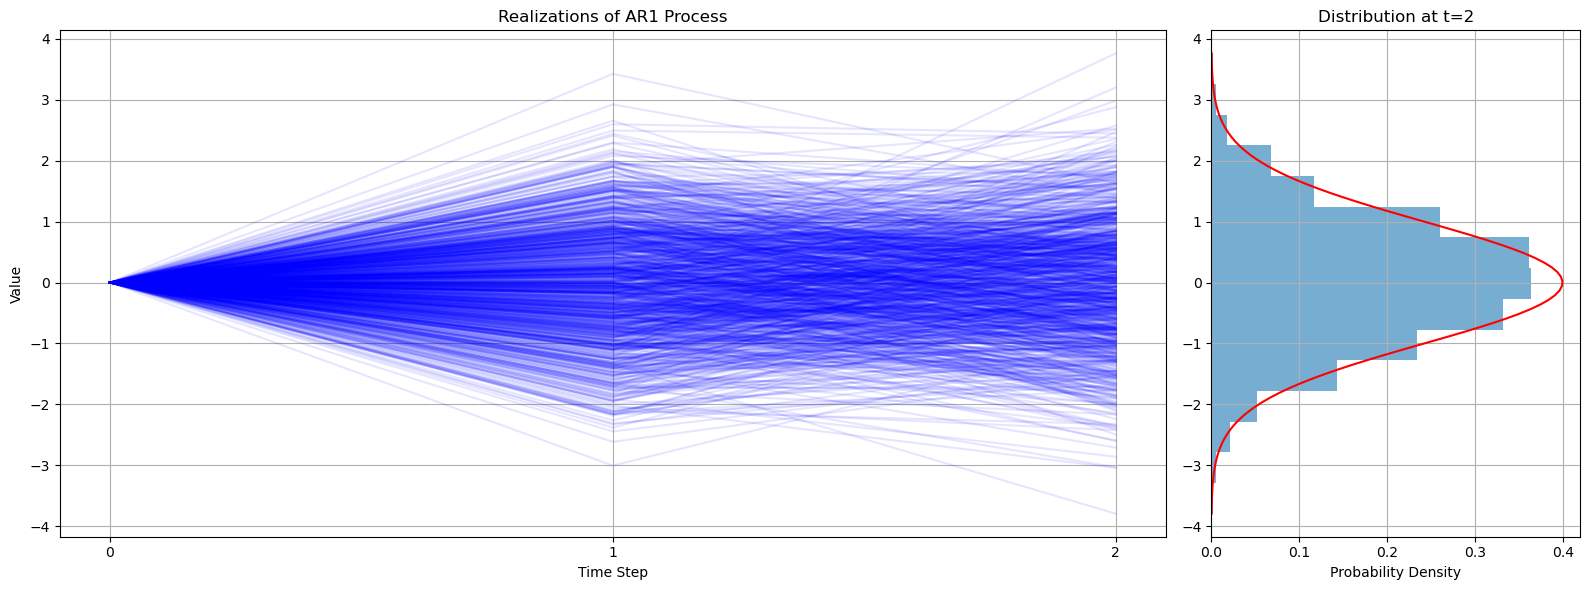

In [8]:
# Parameters
mu = 0  # Constant mean term
alpha = 0.3  # Autoregressive coefficient
sigma = 1  # Standard deviation of the white noise
num_realizations = 1000  # Number of realizations
num_timesteps = 3  # Three timesteps

# Generating realizations for three timesteps
realizations = np.zeros((num_realizations, num_timesteps))
for i in range(num_realizations):
    epsilon = np.random.normal(0, sigma, num_timesteps)  # White noise
    realizations[i, 0] = mu  # Initial value at t=0
    for t in range(1, num_timesteps):
        realizations[i, t] = mu + alpha * (realizations[i, t - 1] - mu) + epsilon[t]

# Extracting values at t=2 for histogram and PDF
X_t = realizations[:, 2]

# Analytical PDF for X_t at t=2
pdf_x_t2 = np.linspace(min(X_t), max(X_t), 100)
pdf_y_t2 = scipy.stats.norm.pdf(
    pdf_x_t2, mu + alpha * (mu + alpha * (mu - mu) - mu), sigma
)

# Plotting
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(16, 6), gridspec_kw={"width_ratios": [3, 1]}
)

# Time series plot
for i in range(num_realizations):
    ax1.plot(range(num_timesteps), realizations[i], color="blue", alpha=0.1)
ax1.set_xlabel("Time Step")
ax1.set_ylabel("Value")
ax1.set_title("Realizations of AR1 Process")
ax1.set_xticks(range(num_timesteps))
ax1.grid(True)

# Rotated histogram and PDF at t=2
ax2.hist(X_t, bins=15, orientation="horizontal", density=True, alpha=0.6)
ax2.plot(pdf_y_t2, pdf_x_t2, "r-")
ax2.set_xlabel("Probability Density")
ax2.set_title("Distribution at t=2")
ax2.grid(True)

plt.tight_layout()
plt.show()

#### Beyond the second timestep (i.e. the general solution)

These steps can be repeated indefinitely, leading to (skipping over the details) the following general expression for the conditional distribution at a given time $t$ given the initial value $x_0$:

$$p(x_t|x_0)\sim\mathcal{N}\left(\phi^t x_0+\frac{1-\phi^t}{1-\phi}k,\frac{1-\phi^{2t}}{1-\phi^2}\sigma^2_W\right)$$

We can find the *asymptotic* or limiting solution to this by letting time go to infinity.  

It's always the case that $|\phi|<1$, otherwise the model blows up.  

As such, as $t$ increases $\phi^t$ gets smaller and smaller, such that the $\phi^t x_0$ term vanishes, the $1-\phi^t$ term becomes just $1$, and similarly the $1-\phi^{2t}$ term becomes just $1$ also.  

Thus, we have:

$$\lim_{t\rightarrow\infty} p(x_t|x_0)\sim\mathcal{N}\left(\frac{1}{1-\phi}k,\frac{1}{1-\phi^2}\sigma^2_W\right)$$

In words, given enough time the distribution becomes approximately a Gaussian with mean $k/(1-\phi)$ and variance $\sigma^2_W/(1-\phi^2)$.  

Notice something cool here: $x_0$ doesn't show up at all!  

This asymptotic solution is the same *no matter what the initial value was*.  

Whether the initial value was originally very close to $k/(1-\phi)$ or very far from it, the AR(1) process moves (so to speak) toward the same distribution determined by the constant $k$ and the strength of the coupling between consecutive timesteps, $\phi$.

Next let's see the corresponding plot:

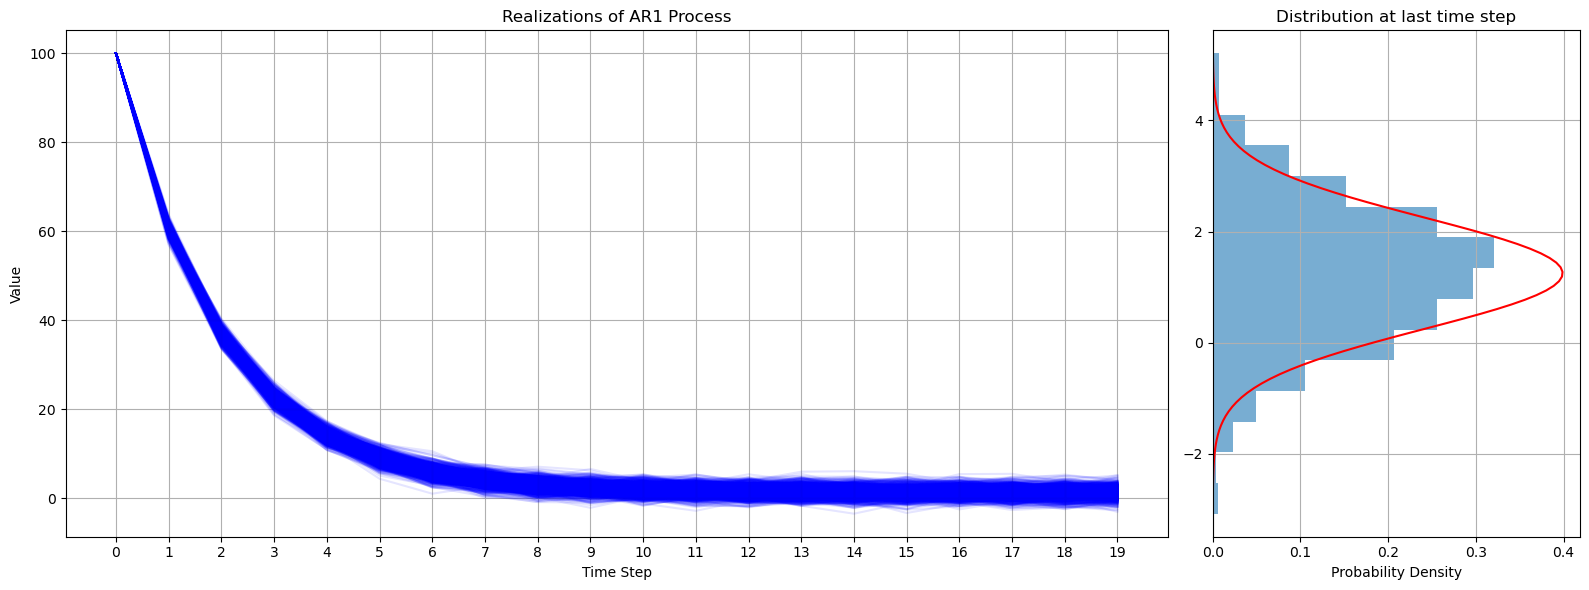

In [9]:
# Parameters
alpha = 0.6  # Autoregressive coefficient
sigma = 1  # Standard deviation of the white noise
k = 0.5  # Constant term
x0 = 100  # initial value
num_realizations = 1000  # Number of realizations
num_timesteps = 20  # num timesteps

# Generating realizations for ten timesteps with the new model
realizations = np.zeros((num_realizations, num_timesteps))
for i in range(num_realizations):
    epsilon = np.random.normal(0, sigma, num_timesteps)  # White noise
    realizations[i, 0] = x0
    for t in range(1, num_timesteps):
        realizations[i, t] = alpha * realizations[i, t - 1] + epsilon[t] + k

# Extracting values at t=9 for histogram and PDF
X_t = realizations[:, -1]  # Last timestep

# Analytical PDF for X_t at t=9
pdf_x_t9 = np.linspace(min(X_t), max(X_t), 100)
# Mean for the PDF considering the cumulative effect of alpha and k over timesteps
mean_t9 = k * (1 - alpha**num_timesteps) / (1 - alpha)
pdf_y_t9 = scipy.stats.norm.pdf(pdf_x_t9, mean_t9, sigma)

# Plotting
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(16, 6), gridspec_kw={"width_ratios": [3, 1]}
)

# Time series plot
for i in range(num_realizations):
    ax1.plot(range(num_timesteps), realizations[i], color="blue", alpha=0.1)
ax1.set_xlabel("Time Step")
ax1.set_ylabel("Value")
ax1.set_title("Realizations of AR1 Process")
ax1.set_xticks(range(num_timesteps))
ax1.grid(True)

# Rotated histogram and PDF at t=9
ax2.hist(X_t, bins=15, orientation="horizontal", density=True, alpha=0.6)
ax2.plot(pdf_y_t9, pdf_x_t9, "r-")
ax2.set_xlabel("Probability Density")
ax2.set_title("Distribution at last time step")
ax2.grid(True)

plt.tight_layout()
plt.show()

Here's an example with a negative $\phi$...notice that negative $\phi$ is ok, so long as its magnitude is less than one: $|\phi|<1$.  In the negative case, the ensemble members are *oscillatory*:

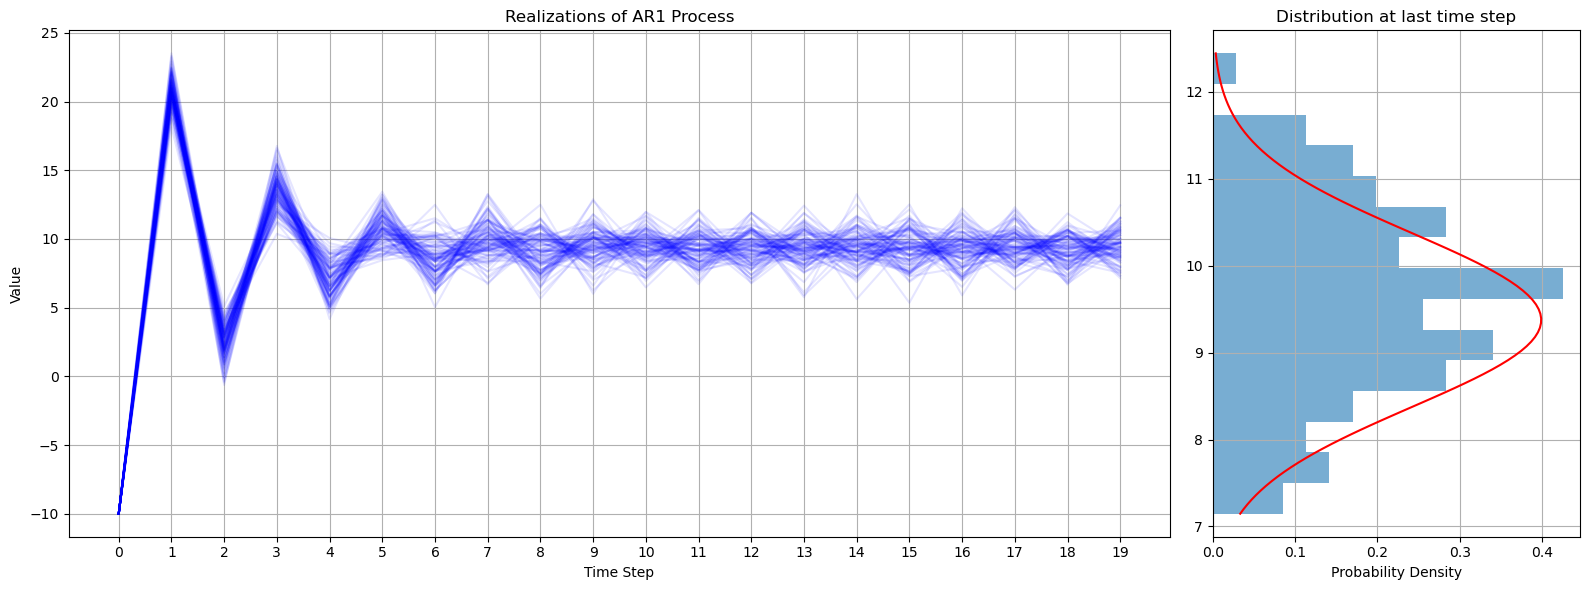

In [10]:
# Parameters
alpha = -0.6  # Autoregressive coefficient
sigma = 1  # Standard deviation of the white noise
k = 15  # Constant term
x0 = -10  # initial value
num_realizations = 100  # Number of realizations
num_timesteps = 20  # num timesteps

# Generating realizations for ten timesteps with the new model
realizations = np.zeros((num_realizations, num_timesteps))
for i in range(num_realizations):
    epsilon = np.random.normal(0, sigma, num_timesteps)  # White noise
    realizations[i, 0] = x0
    for t in range(1, num_timesteps):
        realizations[i, t] = alpha * realizations[i, t - 1] + epsilon[t] + k

# Extracting values at t=9 for histogram and PDF
X_t = realizations[:, -1]  # Last timestep

# Analytical PDF for X_t at t=9
pdf_x_t9 = np.linspace(min(X_t), max(X_t), 100)
# Mean for the PDF considering the cumulative effect of alpha and k over timesteps
mean_t9 = k * (1 - alpha**num_timesteps) / (1 - alpha)
pdf_y_t9 = scipy.stats.norm.pdf(pdf_x_t9, mean_t9, sigma)

# Plotting
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(16, 6), gridspec_kw={"width_ratios": [3, 1]}
)

# Time series plot
for i in range(num_realizations):
    ax1.plot(range(num_timesteps), realizations[i], color="blue", alpha=0.1)
ax1.set_xlabel("Time Step")
ax1.set_ylabel("Value")
ax1.set_title("Realizations of AR1 Process")
ax1.set_xticks(range(num_timesteps))
ax1.grid(True)

# Rotated histogram and PDF at t=9
ax2.hist(X_t, bins=15, orientation="horizontal", density=True, alpha=0.6)
ax2.plot(pdf_y_t9, pdf_x_t9, "r-")
ax2.set_xlabel("Probability Density")
ax2.set_title("Distribution at last time step")
ax2.grid(True)

plt.tight_layout()
plt.show()

And here's an example where $\phi>1$, so the model blows up, meaning it grows larger and larger indefinitely!

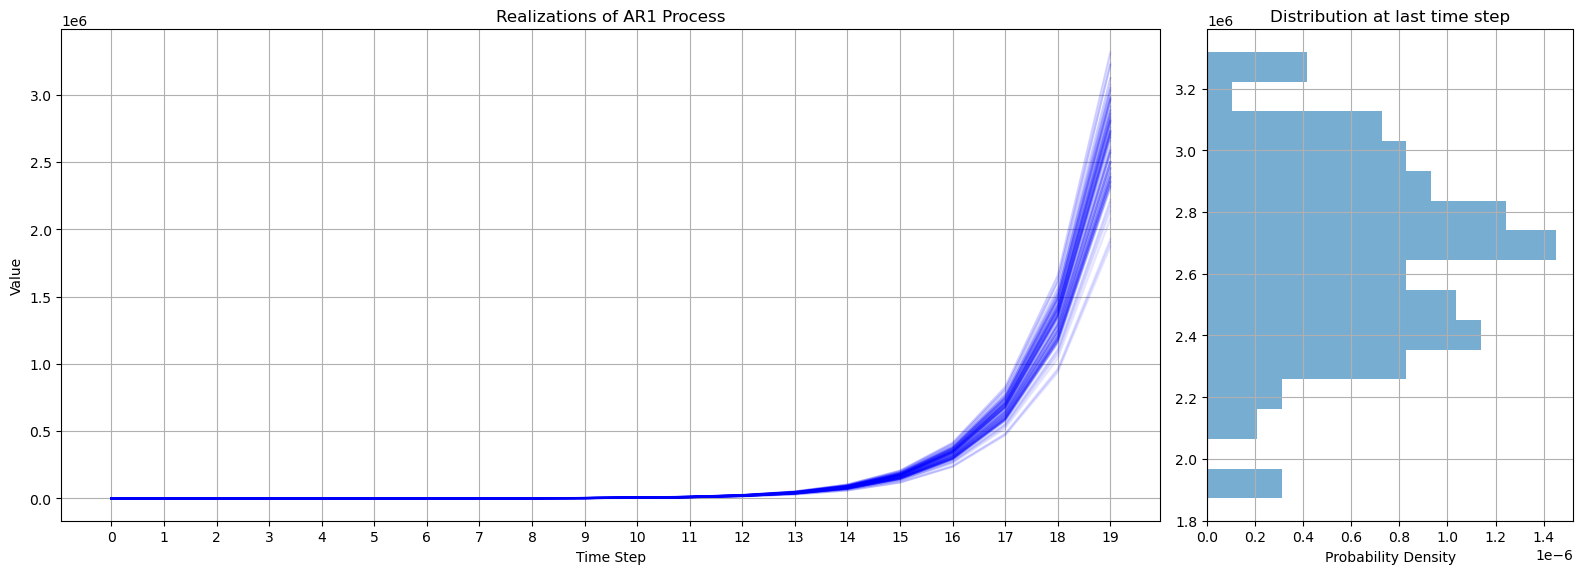

In [11]:
# Parameters
alpha = 2.  # Autoregressive coefficient
sigma = 1  # Standard deviation of the white noise
k = 15  # Constant term
x0 = -10  # initial value
num_realizations = 100  # Number of realizations
num_timesteps = 20  # num timesteps

# Generating realizations for ten timesteps with the new model
realizations = np.zeros((num_realizations, num_timesteps))
for i in range(num_realizations):
    epsilon = np.random.normal(0, sigma, num_timesteps)  # White noise
    realizations[i, 0] = x0
    for t in range(1, num_timesteps):
        realizations[i, t] = alpha * realizations[i, t - 1] + epsilon[t] + k

# Extracting values at t=9 for histogram and PDF
X_t = realizations[:, -1]  # Last timestep

# Analytical PDF for X_t at t=9
pdf_x_t9 = np.linspace(min(X_t), max(X_t), 100)
# Mean for the PDF considering the cumulative effect of alpha and k over timesteps
mean_t9 = k * (1 - alpha**num_timesteps) / (1 - alpha)
pdf_y_t9 = scipy.stats.norm.pdf(pdf_x_t9, mean_t9, sigma)

# Plotting
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(16, 6), gridspec_kw={"width_ratios": [3, 1]}
)

# Time series plot
for i in range(num_realizations):
    ax1.plot(range(num_timesteps), realizations[i], color="blue", alpha=0.1)
ax1.set_xlabel("Time Step")
ax1.set_ylabel("Value")
ax1.set_title("Realizations of AR1 Process")
ax1.set_xticks(range(num_timesteps))
ax1.grid(True)

# Rotated histogram and PDF at t=9
ax2.hist(X_t, bins=15, orientation="horizontal", density=True, alpha=0.6)
ax2.plot(pdf_y_t9, pdf_x_t9, "r-")
ax2.set_xlabel("Probability Density")
ax2.set_title("Distribution at last time step")
ax2.grid(True)

plt.tight_layout()
plt.show()

Notice the y-axis scale...after 20 timesteps the model solutions are centered around 2.5 million!

If $\phi>1$, then whatever the value at the previous timestep, its magnitude becomes even larger the next timestep (the noise term might bring that down sometimes, but not always), and so on and so on, so it just grows without bound.

#### Autocorrelation function of an AR(1) process
This is simply

$$\rho_\tau=\frac{c(\tau)}{c(0)}=\phi^{|\tau|}.$$

Since $0<\phi<1$, the autocorrelation becomes smaller in magnitude as the lag increases in either direction.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
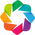

Column
    [0] Row
        [0] FloatSlider(end=0.99, name='Autocorrelation C..., start=-0.99, step=0.01, value=0.5)
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [12]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf

hv.extension("bokeh")
pn.extension()

# Function to generate an AR(1) process and its ACF
def generate_ar1_process(phi, size=5000):
    # Define AR(1) process with no MA component
    ar = np.array([1, -phi])
    ma = np.array([1])
    AR_object = ArmaProcess(ar, ma)
    return AR_object.generate_sample(nsample=size)


# Function to calculate the ACF of the time series
def calculate_acf(time_series, nlags=40):
    acf_vals = acf(time_series, nlags=nlags, fft=False)
    return acf_vals


# Create the interactive plot
def interactive_plot(phi):
    # Generate the time series
    time_series = generate_ar1_process(phi)

    # Calculate the empirical ACF
    acf_values = calculate_acf(time_series, nlags=40)
    lags = np.arange(len(acf_values))

    # Calculate the theoretical ACF for an AR(1) process
    theoretical_acf = [phi**k for k in lags]

    # Create the Holoviews plots
    ts_plot = hv.Curve(time_series).opts(
        width=400,
        height=400,
        title=f"AR(1) Time Series with phi={phi}",
        tools=["hover"],
    )
    acf_plot = hv.Curve((lags, acf_values)).opts(
        width=400, height=400, title="ACF", ylim=(-1, 1), xlim=(0, 40), tools=["hover"]
    )

    # Overlay the theoretical ACF on the empirical ACF plot
    theoretical_acf_plot = hv.Curve((lags, theoretical_acf)).opts(
        line_dash="dotted", color="red"
    )
    acf_combined = acf_plot * theoretical_acf_plot

    # Combine the time series plot and the combined ACF plot into a layout without linking the axes
    layout = (ts_plot + acf_combined).opts(shared_axes=False).cols(2)
    return layout


# Slider for the phi coefficient
phi_slider = pn.widgets.FloatSlider(
    name="Autocorrelation Coefficient (phi)",
    start=-0.99,
    end=0.99,
    step=0.01,
    value=0.5,
)


# Interactive function to update plot based on slider value
@pn.depends(phi=phi_slider)
def update_plot(phi):
    return interactive_plot(phi)


# Panel layout
pn.Column(pn.Row(phi_slider), update_plot).servable()

### Fitting to Central Park temperature anomalies

#### Compute the detrended temperature anomalies at daily, monthly, and annual resolution

In [13]:
ds_cp_mon = ds_cp.resample(dict(time="1ME")).mean()

In [14]:
ds_cp_ann = ds_cp.groupby("time.year").mean()

In [15]:
def _infer_dim_if_1d(arr, dim):
    """Helper function to get dim name of 1D arrays."""
    if dim is None:
        if arr.ndim == 1:
            dim = arr.dims[0]
        else:
            raise ValueError("Dimension must be specified if array isn't 1D.")
    return dim


# Trends: computing trends, detrending, etc.
def trend(arr, dim=None, order=1, return_coeffs=False):
    """Compute linear or higher-order polynomial fit.

    If return_coeffs is True, then coeffs.degree(sel=0) is the y-intercept,
    coeffs.degree(sel=1) is the slope, etc.

    """
    dim = _infer_dim_if_1d(arr, dim)
    coeffs = arr.polyfit(dim, order)["polyfit_coefficients"]
    if return_coeffs:
        return coeffs
    return xr.polyval(arr[dim], coeffs)


def detrend(arr, dim=None, order=1):
    """Subtract off the linear or higher order polynomial fit."""
    dim = _infer_dim_if_1d(arr, dim)
    return (arr - trend(arr, dim, order) + arr.mean(dim)).transpose(*arr.dims)

In [16]:
tanom_dt_day = detrend(ds_cp["temp_anom"])
tanom_dt_mon = detrend(ds_cp_mon["temp_anom"])
tanom_dt_ann = detrend(ds_cp_ann["temp_anom"])

#### Compute the ACF for these temperature anomaly timeseries

In [17]:
acf_tanom_day = sm.tsa.acf(tanom_dt_day, fft=False, nlags=len(tanom_dt_day) - 1)
acf_tanom_mon = sm.tsa.acf(tanom_dt_mon, fft=False, nlags=len(tanom_dt_mon) - 1)
acf_tanom_ann = sm.tsa.acf(tanom_dt_ann, fft=False, nlags=len(tanom_dt_ann) - 1)

(0.0, 100.0)

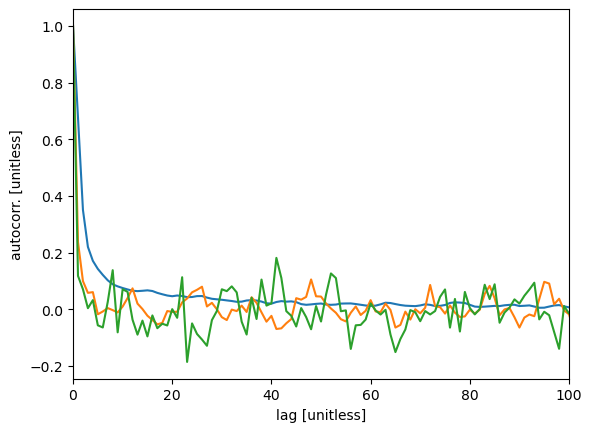

In [18]:
fig, ax = plt.subplots()
ax.plot(acf_tanom_day)
ax.plot(acf_tanom_mon)
ax.plot(acf_tanom_ann)

ax.set_xlabel("lag [unitless]")
ax.set_ylabel("autocorr. [unitless]")
ax.set_xlim(0, 100)

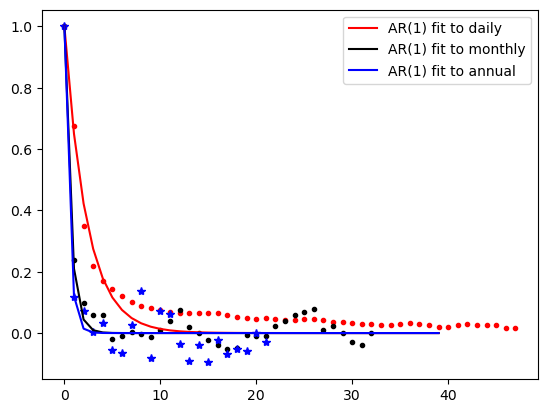

In [19]:
fig, ax = plt.subplots()
ax.plot(sm.tsa.acf(tanom_dt_day), ".r")
ax.plot(sm.tsa.acf(tanom_dt_mon), ".k")
ax.plot(sm.tsa.acf(tanom_dt_ann), "*b")
ax.plot(np.arange(40), 0.65 ** np.arange(40), "-r", label="AR(1) fit to daily")
ax.plot(np.arange(40), 0.21 ** np.arange(40), "-k", label="AR(1) fit to monthly")
ax.plot(np.arange(40), 0.12 ** np.arange(40), "-b", label="AR(1) fit to annual")
ax.legend()

### AR(2): 2nd order autoregressive model

The AR(1) model depends only on the immediately preceding value.  

The AR(2) model depends on that value *and the one before that*, i.e on the two most recent values.  

But otherwise it is formulated in just the same way as the AR(1) model.  

Formally:

$$X_t=\phi_1 X_{t-1}+\phi_2 X_{t-2}+W_t+k,$$

where $\phi_1$ and $\phi_2$ are both constants.

Next is an interactive plot that generates timeseries for an AR(2) process with values of $\phi_1$ and $\phi_2$ of your choosing:

In [20]:
# Function to generate an AR(2) process
def generate_ar2_process(phi1, phi2, size=100):
    # Define AR(2) process with no MA component
    ar = np.array([1, -phi1, -phi2])
    ma = np.array([1])
    AR_object = ArmaProcess(ar, ma)
    return AR_object.generate_sample(nsample=size)


# Create the interactive plot
def interactive_autocorrelation(phi1, phi2):
    time_series = generate_ar2_process(phi1, phi2)
    acf_values = acf(time_series, nlags=40, fft=False)

    ts_plot = hv.Curve(time_series).opts(
        width=400,
        height=400,
        title=f"AR(2) Time Series with phi1={phi1}, phi2={phi2}",
        tools=["hover"],
    )
    acf_plot = hv.Curve((list(range(len(acf_values))), acf_values)).opts(
        width=400, height=400, title="ACF", ylim=(-1, 1), xlim=(0, 40), tools=["hover"]
    )

    layout = (ts_plot + acf_plot).opts(shared_axes=False).cols(2)
    return layout


# Sliders for the phi coefficients
phi1_slider = pn.widgets.FloatSlider(
    name="Autocorrelation Coefficient (phi1)",
    start=-0.99,
    end=0.99,
    step=0.01,
    value=0.5,
)
phi2_slider = pn.widgets.FloatSlider(
    name="Autocorrelation Coefficient (phi2)",
    start=-0.99,
    end=0.99,
    step=0.01,
    value=-0.5,
)


# Interactive function to update plot based on slider values
@pn.depends(phi1=phi1_slider, phi2=phi2_slider)
def update_plot(phi1, phi2):
    return interactive_autocorrelation(phi1, phi2)


# Panel layout
pn.Column(pn.Row(phi1_slider, phi2_slider), update_plot).servable()

Column
    [0] Row
        [0] FloatSlider(end=0.99, name='Autocorrelation C..., start=-0.99, step=0.01, value=0.5)
        [1] FloatSlider(end=0.99, name='Autocorrelation C..., start=-0.99, step=0.01, value=-0.5)
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [21]:
model_tanom_day_ar2 = sm.tsa.ARIMA(tanom_dt_day.values, order=(2, 0, 0))
tanom_day_ar2 = model_tanom_day_ar2.fit()

In [22]:
model_tanom_day_ar3 = sm.tsa.ARIMA(tanom_dt_day.values, order=(3, 0, 0))
tanom_day_ar3 = model_tanom_day_ar3.fit()

In [23]:
acf_tanom_day_ar2 = ArmaProcess(
    np.r_[1, -tanom_day_ar2.arparams], ma=np.array([1])
).acf(lags=30)

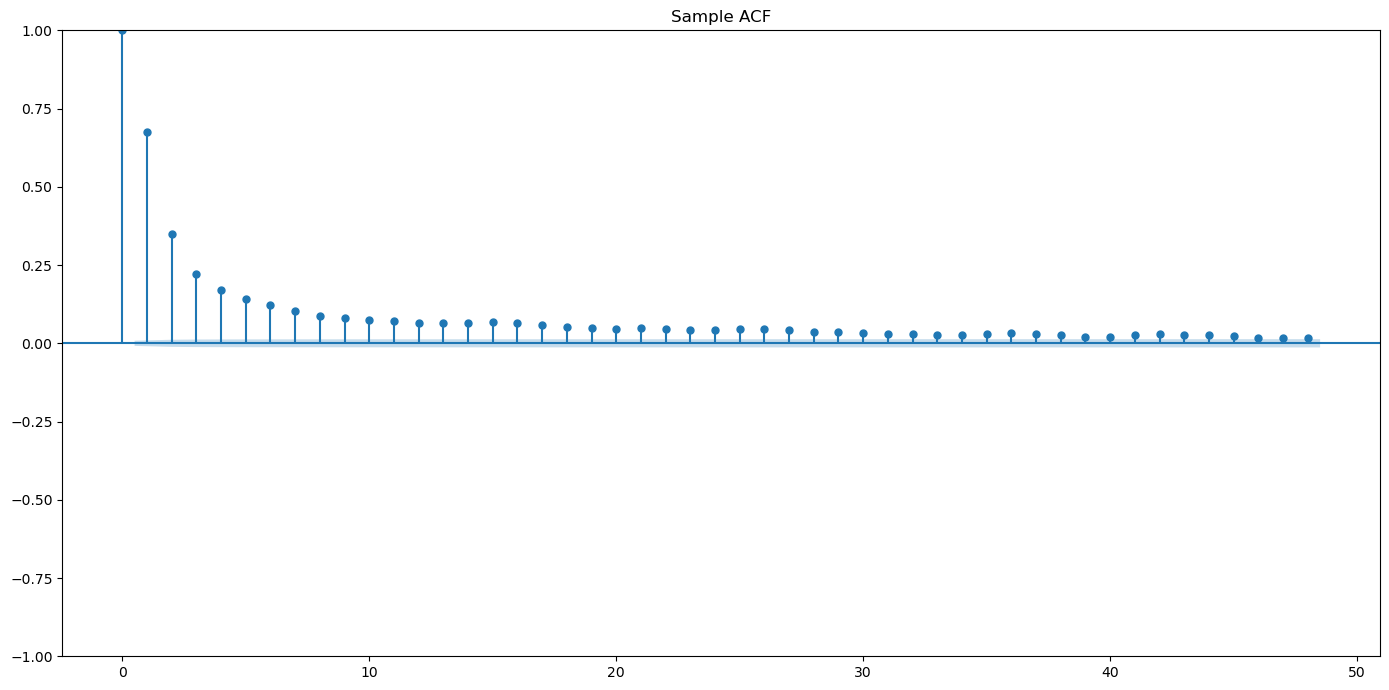

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

# Fit an AR(2) model
ar_model = sm.tsa.ARIMA(tanom_dt_day.values, order=(2, 0, 0))
ar_result = ar_model.fit()

# Plot the sample ACF of the original time series data
plt.figure(figsize=(14, 7))
plt.subplot(111)
plot_acf(tanom_dt_day.values, ax=plt.gca(), title="Sample ACF")

#plt.plot(sm.tsa.acf(tanom_dt_day), ".r")


# Plot the ACF of the residuals from the AR(2) model
#residuals = ar_result.resid
#plt.subplot(122)
#plot_acf(residuals, ax=plt.gca(), title="Fitted AR(2) Model Residuals ACF")

plt.tight_layout()
plt.show()